## **Project - Clothing Outfit Detection**

**Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Dense, Activation, Flatten

In [ ]:
# loads the fashion MNIST dataset
# dataset of 60,000 28x28 grayscale images of 10 fashion categories
# test set of 10,000 images
# consists of Grayscale images

(X_train , y_train) , (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
#giving the shapes of the X_tain, y_train and X_test, y_test

# X_train is numpy array of grayscale images of training data
# y_train is numpy array of labels of training data
# X_test is numpy array of garyscale images of testing data
# y_test is numpy array of labels of testing data
X_train.shape, y_train.shape , "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
X_test[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train[0]

9

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

**Class Labels**

In [ ]:
# List of class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker","Bag", "Ankle Boot" ]

In [ ]:
# printing the class_labels
print("The class labels are:\n ", class_labels)

The class labels are:
  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


In [ ]:
# calculating the Length of the class labels using len() function
num_classes = len(class_labels)
print("Number of class labels: " , num_classes)

Number of class labels:  10


In [ ]:
# np.unique() function is used for finding the unique elements of an array
labels_unique = np.unique(y_train)
print("Unique Labels: " , labels_unique)

Unique Labels:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# returns type of the data(int, float etc.) and size of the data(number of bytes)
X_train.dtype

dtype('uint8')

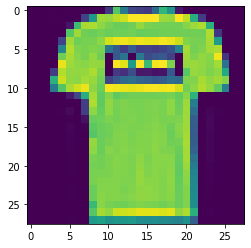

In [ ]:
# plt.imshow() is used to create image from 2-D numpy array
# cmap is used to control the colormap used to display the values
plt.imshow(X_train[1], cmap="viridis")

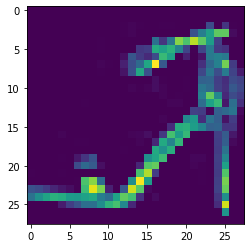

In [ ]:
plt.imshow(X_train[8], cmap="viridis")

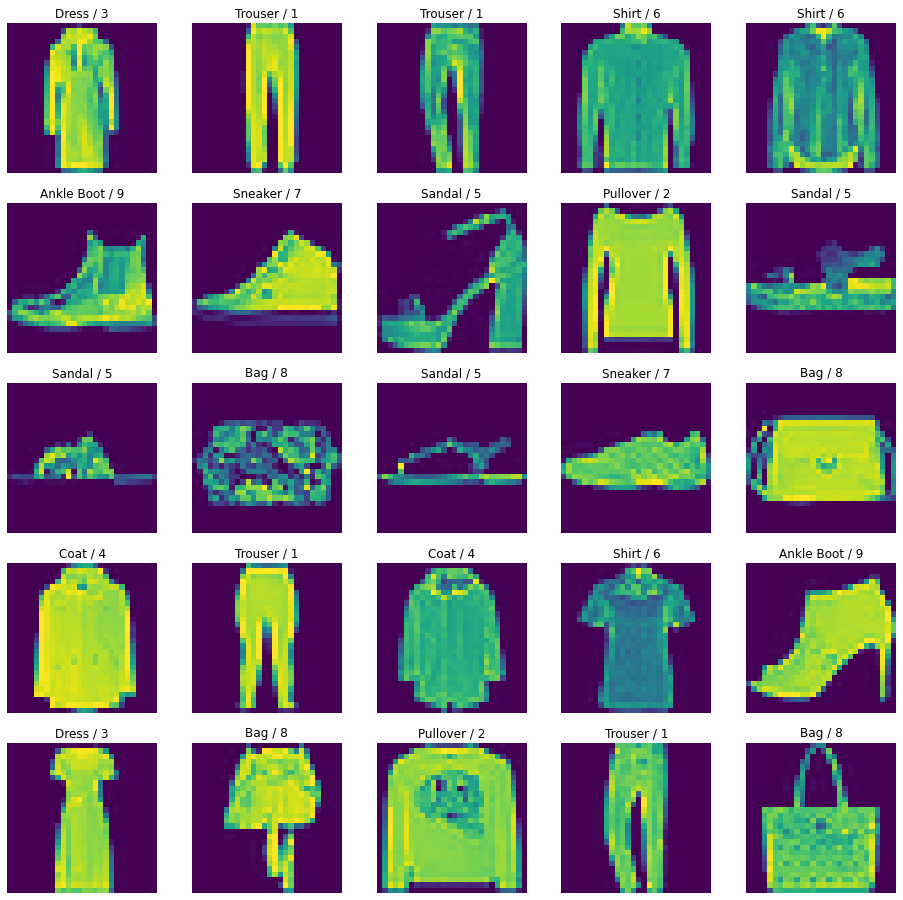

In [ ]:
# figsize is the attribute of matploltlib which allows us to specify the width and height of a figure.
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i], cmap="viridis")
  plt.axis("off")
  plt.title("{} / {}" .format(class_labels[y_train[i]], y_train[i]))

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train = X_train/255
X_test = X_test/255


In [ ]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

print('Original label:', y_train[4738])

print('After conversion to one-hot:', train_Y_one_hot[4738])


Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
print('Shape:', X_train.shape)
print('Shape:', train_Y_one_hot.shape)

Shape: (60000, 28, 28, 1)
Shape: (60000, 10)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, train_Y_one_hot, test_size=0.2, random_state=202)

In [ ]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

In [ ]:
cnn_model = keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="valid", activation="relu", input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax"),

])

In [ ]:
cnn_model.add(Flatten())

In [ ]:
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
from tensorflow.keras import optimizers
cnn_model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
3000/3000 [==============================] - 59s 19ms/step - loss: 0.5738 - accuracy: 0.7878 - val_loss: 0.4033 - val_accuracy: 0.8647
Epoch 2/20
3000/3000 [==============================] - 53s 18ms/step - loss: 0.4150 - accuracy: 0.8555 - val_loss: 0.4093 - val_accuracy: 0.8569
Epoch 3/20
3000/3000 [==============================] - 54s 18ms/step - loss: 0.4334 - accuracy: 0.8539 - val_loss: 0.4643 - val_accuracy: 0.8533
Epoch 4/20
3000/3000 [==============================] - 50s 17ms/step - loss: 0.4584 - accuracy: 0.8473 - val_loss: 0.4446 - val_accuracy: 0.8423
Epoch 5/20
3000/3000 [==============================] - 52s 17ms/step - loss: 0.5023 - accuracy: 0.8363 - val_loss: 0.4350 - val_accuracy: 0.8495
Epoch 6/20
3000/3000 [==============================] - 52s 17ms/step - loss: 0.5351 - accuracy: 0.8254 - val_loss: 0.6325 - val_accuracy: 0.7593
Epoch 7/20
3000/3000 [==============================] - 52s 17ms/step - loss: 0.5586 - accuracy: 0.8170 - val_loss: 0.4695 -

In [ ]:
y_pred = cnn_model.predict(X_test)
y_pred.shape

313/313 [==============================] - 3s 9ms/step


(10000, 10)

In [ ]:
cnn_model.compile(loss="sparse_categorical_crossentropy")
test_accuracy = cnn_model.evaluate(X_test, y_test)
print("\n Accuracy of the model:",test_accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.7073 - sparse_categorical_accuracy: 0.7793

 Accuracy of the model: [0.7073314189910889, 0.7792999744415283]


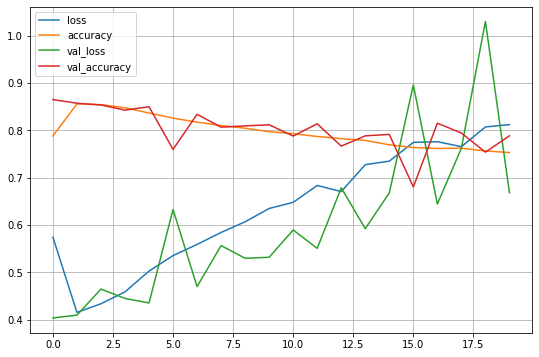

In [ ]:
pd.DataFrame(history.history).plot(figsize=(9,6))
plt.grid(True)
plt.show()

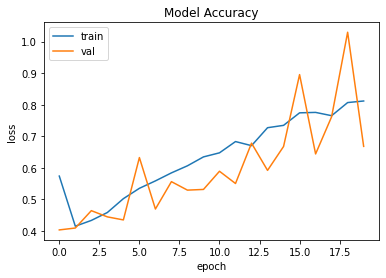

In [ ]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

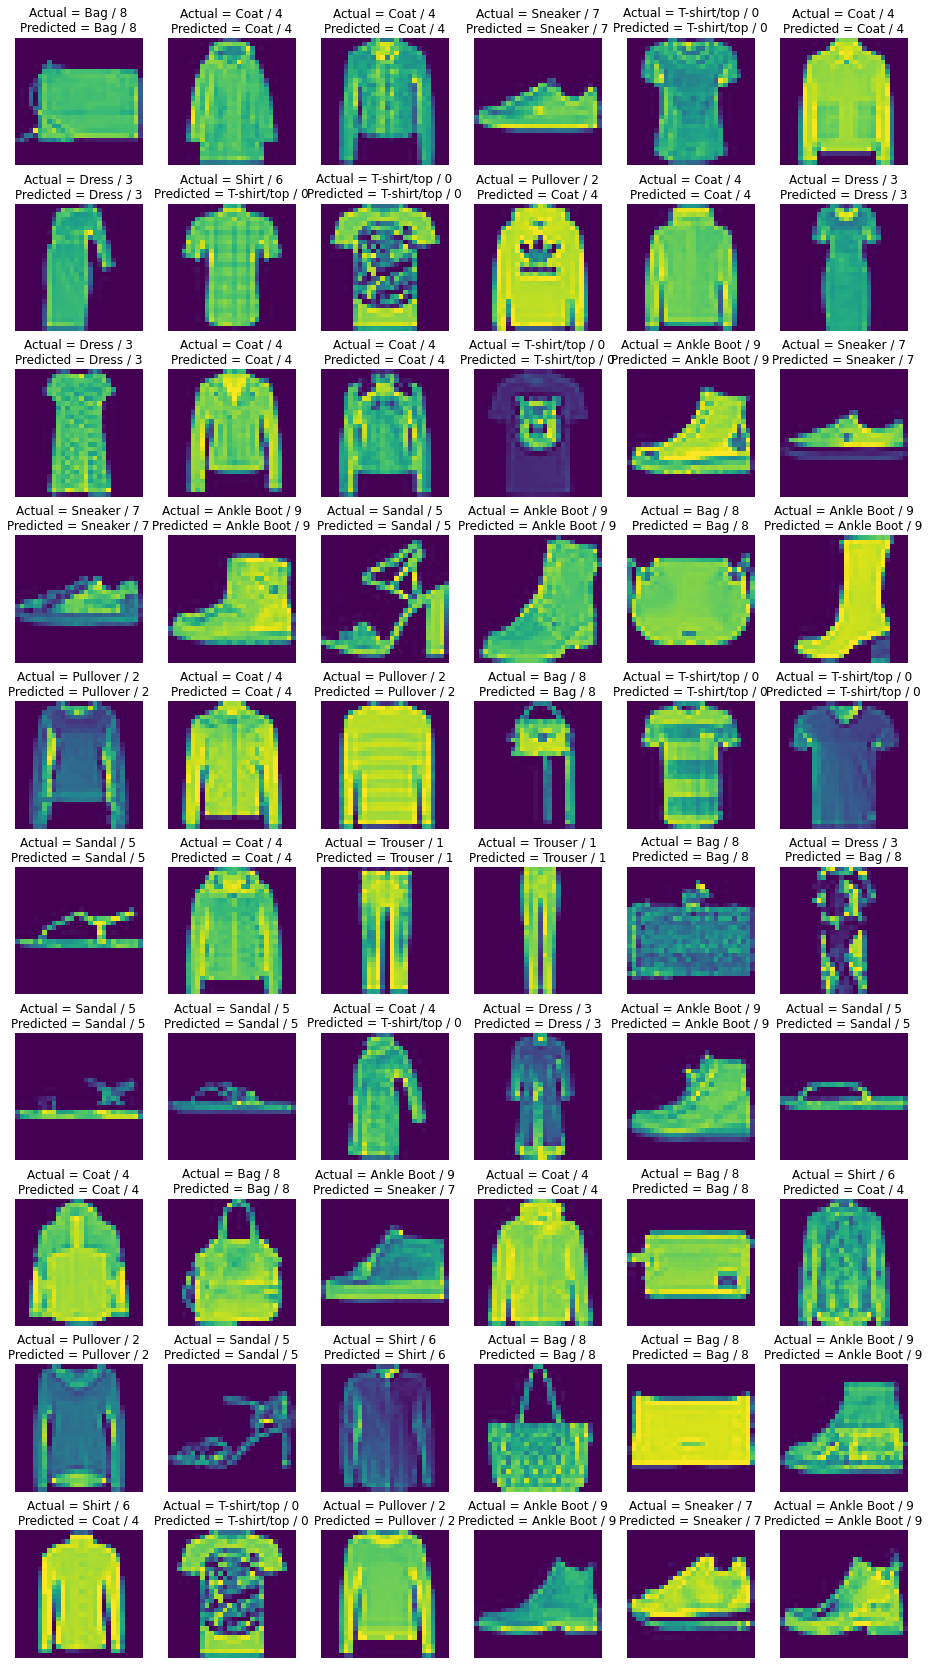

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap="viridis")
  plt.title("Actual = {} / {}\nPredicted = {} / {}" .format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis("off")

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

conv2d (3, 3, 1, 32)


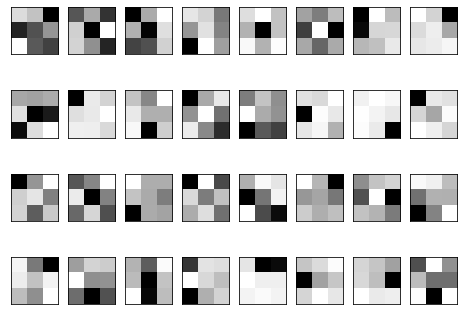

In [ ]:
layer = cnn_model.layers #Conv layers at 0, 
filters, biases = cnn_model.layers[0].get_weights()
print(layer[0].name, filters.shape)


fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = 32 ## the number of filters in our first layer 
for i in range(1, n_filters + 1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

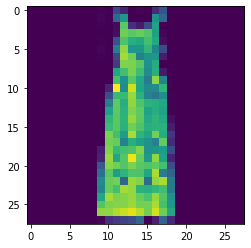

In [ ]:
choice = 50
img = X_train[choice,:,:]
plt.imshow(img.squeeze())

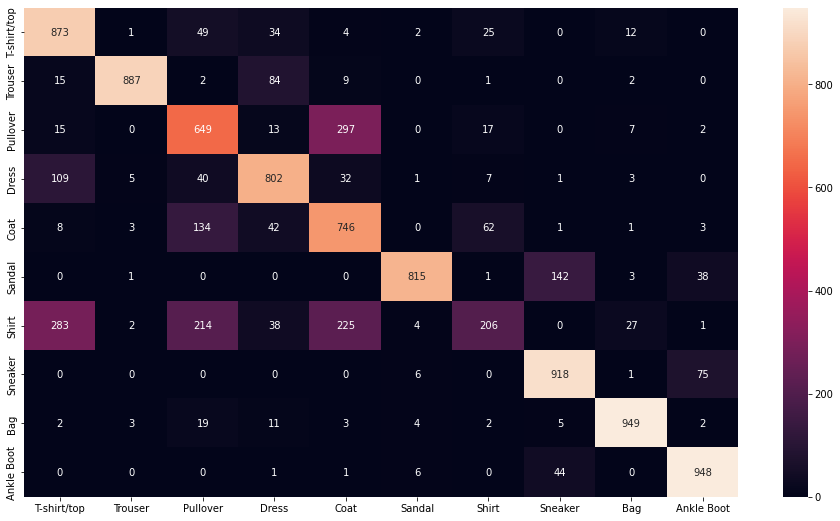

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True , fmt = "d" , xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)

In [ ]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.67      0.87      0.76      1000
     Trouser       0.98      0.89      0.93      1000
    Pullover       0.59      0.65      0.62      1000
       Dress       0.78      0.80      0.79      1000
        Coat       0.57      0.75      0.64      1000
      Sandal       0.97      0.81      0.89      1000
       Shirt       0.64      0.21      0.31      1000
     Sneaker       0.83      0.92      0.87      1000
         Bag       0.94      0.95      0.95      1000
  Ankle Boot       0.89      0.95      0.92      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000



In [ ]:
cnn_model.save("fashion_mnist_cnn_models.h5")

In [ ]:
fashion_mnist_cnn_model = tf.keras.models.load_model("fashion_mnist_cnn_models.h5")

In [ ]:
# make a prediction for a new image.
#the sample image is of pullover having label 2

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/MyDrive/sample_image.png')
	# load model
	model = load_model('fashion_mnist_cnn_models.h5')
	# predict the class
	result = np.argmax(model.predict(img), axis=-1)
	print("The result is:",result[0])
 
# entry point, run the example
run_example()

/usr/local/lib/python3.7/dist-packages/keras/utils/image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 102ms/step
The result is: 2


In [ ]:
# make a prediction for a new image.
#the sample image is of scandal having label 5

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/MyDrive/sample_image1.PNG')
	# load model
	model = load_model('fashion_mnist_cnn_models.h5')
	# predict the class
	result = np.argmax(model.predict(img), axis=-1)
	print("The result is:",result[0])
 
# entry point, run the example
run_example()

1/1 [==============================] - 0s 186ms/step
The result is: 5


In [ ]:
# make a prediction for a new image.
#the sample image is of tshirt having label 0

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/MyDrive/image1.png')
	# load model
	model = load_model('fashion_mnist_cnn_models.h5')
	# predict the class
	result = np.argmax(model.predict(img), axis=-1)
	print("The result is:",result[0])
 
# entry point, run the example
run_example()

1/1 [==============================] - 0s 91ms/step
The result is: 0


In [ ]:
# make a prediction for a new image.
#the sample image is of scandal having label 5

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/MyDrive/image4.png')
	# load model
	model = load_model('fashion_mnist_cnn_models.h5')
	# predict the class
	result = np.argmax(model.predict(img), axis=-1)
	print("The result is:",result[0])
 
# entry point, run the example
run_example()

1/1 [==============================] - 0s 89ms/step
The result is: 6
